# Introduction

In this notebook, we explore the user data from a [travel dataset](https://www.kaggle.com/leomauro/argodatathon2019).

## Load data

- Imports
- Load pandas `DataFrame`

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # plotting
import seaborn as sns # more plotting

plt.style.use('seaborn-colorblind') # plotting style

In [2]:
import os

# Listing all datasets
pathFiles = []
for dirname, _, filenames in os.walk(os.path.join('..', 'kaggle')):
    for filename in filenames:
        pathFile = os.path.join(dirname, filename)
        pathFiles.append(pathFile)
        print(pathFile)

..\kaggle\flights.csv
..\kaggle\hotels.csv
..\kaggle\users.csv


In [3]:
# Importing users dataset
dfUser = pd.read_csv(pathFiles[2], delimiter=',')
dfUser.dataframeName = 'users.csv'
nRow, nCol = dfUser.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1340 rows and 5 columns


In [4]:
# Viewing the first 3 rows
dfUser.head(3)

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48


In [5]:
# DataFrame details
dfUser.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


## Companies

- How many employees by company?
- Gender by company.
- Age by company.

### How many employees by company?

In [6]:
D = dfUser['company'].value_counts()
D

4You             453
Acme Factory     261
Wonka Company    237
Monsters CYA     195
Umbrella LTDA    194
Name: company, dtype: int64

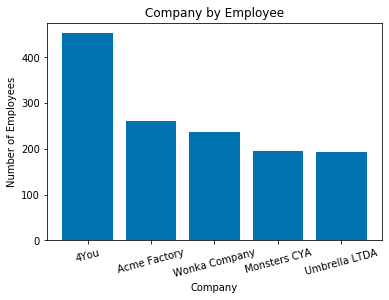

In [7]:
fig, ax = plt.subplots()

ax.bar(range(len(D)), D.values, align='center')
plt.xticks(range(len(D)), D.index, rotation=15)

ax.set_title('Company by Employee')
ax.set_ylabel('Number of Employees')
ax.set_xlabel('Company')

plt.show()

### Employee's gender by company

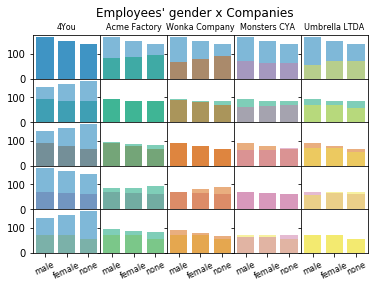

In [27]:
alphaDegree = 0.5
palette = sns.color_palette()
fig, axs = plt.subplots(len(D.index), len(D.index), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.suptitle("Employees' gender x Companies")
genders = dfUser['gender'].unique()

for i, company in enumerate(D.index):
    for j, company2 in enumerate(D.index):
        tmp = dfUser.query('company=="%s"' % company)
        tmp2 = dfUser.query('company=="%s"' % company2)
        tmpValues = tmp['gender'].value_counts()
        tmp2Values = tmp2['gender'].value_counts()
        axs[i, j].bar(tmpValues.index, tmpValues.values, alpha=alphaDegree, color=palette[i])
        axs[i, j].bar(tmp2Values.index, tmp2Values.values, alpha=alphaDegree, color=palette[j])
        axs[i, j].tick_params(axis="x", labelsize=8, rotation=25)
        # Vertical names
        if i==0:
            axs[i, j].set_title(D.index[j], fontsize=8)
plt.show()

### Employee's age by company

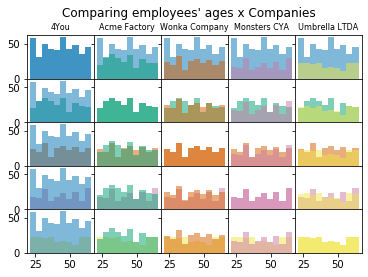

In [8]:
alphaDegree = 0.5
palette = sns.color_palette()
fig, axs = plt.subplots(len(D.index), len(D.index), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.suptitle("Employees' ages x Companies")


for i, company in enumerate(D.index):
    for j, company2 in enumerate(D.index):
        tmp = dfUser.query('company=="%s"' % company)
        tmp2 = dfUser.query('company=="%s"' % company2)
        axs[i, j].hist(tmp['age'], alpha=alphaDegree, color=palette[i])
        axs[i, j].hist(tmp2['age'], alpha=alphaDegree, color=palette[j])
        # Vertical names
        if i==0:
            axs[i, j].set_title(D.index[j], fontsize=8)


In [37]:
dfUser.groupby(['company'])['age'].describe(percentiles=[])

,count,mean,std,min,50%,max
company,,,,,,
4You,453.0,42.688742,12.869590,21.0,43.0,65.0
Acme Factory,261.0,42.126437,12.239725,21.0,41.0,65.0
Monsters CYA,195.0,43.830769,13.069090,21.0,44.0,65.0
Umbrella LTDA,194.0,42.170103,13.556137,21.0,40.0,65.0
Wonka Company,237.0,43.097046,12.845029,21.0,43.0,65.0
